In [136]:
import csv
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [71]:
t = ["mineria","datos","expectativa","expandir","conocimientos","informacion",]
q = ["expectativa","aprender","utilizar","herramientas","conocimientos","datos","informacion"]

In [80]:
p = {}
r = {}

for i in t:
    p[i] = p.get(i,0)+1
for i in q:
    r[i] = r.get(i,0) + 1
    
for i in p.keys():
    if not i in r.keys():
        r[i] = 0

for i in r.keys():
    if not i in p.keys():
        p[i] = 0


In [81]:
cols = []
for i in t:
    cols.append(i)
for i in q:
    cols.append(i)
cols = set(cols)

df = pd.DataFrame(columns=cols)
df = df.append(p,ignore_index=True)
df = df.append(r,ignore_index=True)
df

,informacion,utilizar,expandir,mineria,herramientas,expectativa,conocimientos,aprender,datos
0,1,0,1,1,0,1,1,0,1
1,1,1,0,0,1,1,1,1,1


In [84]:
arr1 = df.values[0]
arr2 = df.values[1]
np.dot(arr1,arr2)

4

In [75]:
val = [0.4, 0.2, 0.1, 0.08, 0.08, 0.08, 0.06]
total = sum(val)
p = 0
for a,i in enumerate(val):
    p+=i
    if p/total >= .75:
        print(p,a)

0.78 3
0.86 4
0.94 5
1.0 6


In [204]:
df = pd.read_csv("ceneval.csv") 
df = df.drop(['genero'],axis=1)
mean = df.mean()
df = df-mean
df

,ceneval_global,ceneval_analitico,ceneval_matematico,ceneval_lengua,ceneval_esp
0,83.3391,68.15917,148.039446,77.813149,38.510727
1,41.3391,-3.84083,124.039446,-18.186851,62.510727
2,41.3391,-3.84083,124.039446,5.813149,38.510727
3,-18.6609,-75.84083,-43.960554,29.813149,14.510727
4,-78.6609,-75.84083,-139.960554,-42.186851,-57.489273
...,...,...,...,...,...
1440,-108.6609,-99.84083,-139.960554,-114.186851,-81.489273
1441,-18.6609,92.15917,-115.960554,53.813149,-105.489273
1442,-114.6609,-147.84083,-115.960554,-138.186851,-57.489273
1443,-60.6609,-75.84083,-43.960554,-114.186851,-9.489273


In [206]:
pca_v = PCA().fit(df)
trans = pca_v.transform(df)
pca_v.n_components_
ev = pca_v.explained_variance_
ev = 100*ev/np.sum(ev)
trans[:]

array([[-1.90914537e+02,  4.88573004e+01, -7.09904946e+00,
         4.64608224e+01, -5.63153060e-01],
       [-9.61355508e+01,  3.75852049e+01,  8.19535148e+01,
         6.30595532e+01, -4.82031477e-01],
       [-9.66362399e+01,  4.27475741e+01,  4.93390120e+01,
         7.08939001e+01, -3.53684582e-01],
       ...,
       [ 2.58598783e+02, -1.82152337e+01,  5.71877056e+01,
         1.93834810e+01,  4.76442959e-01],
       [ 1.35938560e+02,  4.97029132e+00,  7.71617193e+01,
         5.90443354e+00, -2.85731021e-02],
       [ 2.12562414e+02,  6.21811450e+01,  2.88157484e+01,
        -7.59837389e+00,  1.82226161e-01]])

## Producto principales componentes


In [207]:
np.dot(trans[:,0],trans[:,1])

-2.0634615793824196e-08

In [214]:
for i in trans:
    if i[1] == max(abs(trans[:,1])):
        print(i)

[ 2.58648275e+02  3.47965011e+02 -3.73036085e+00 -3.43621605e+01
 -1.72429810e-01]


[71.98977811173138, 84.36224117189084, 92.28594715216498, 99.9078688740828, 100.00000000000001]


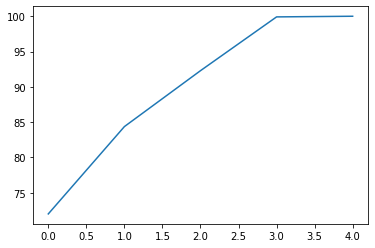

In [215]:
### Varianza acumulada

ac_va = []
for i in range(len(ev)):
    ac = np.sum(ev[:i+1])
    ac_va.append(ac)
print(ac_va)
plt.plot(range(len(ev)),ac_va)